# Explore here

In [1]:
import pandas as pd

sales_df = pd.read_csv('/workspaces/car_study_eda/data/raw/car_price_dataset.csv')

sales_df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [2]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [3]:
sales_df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

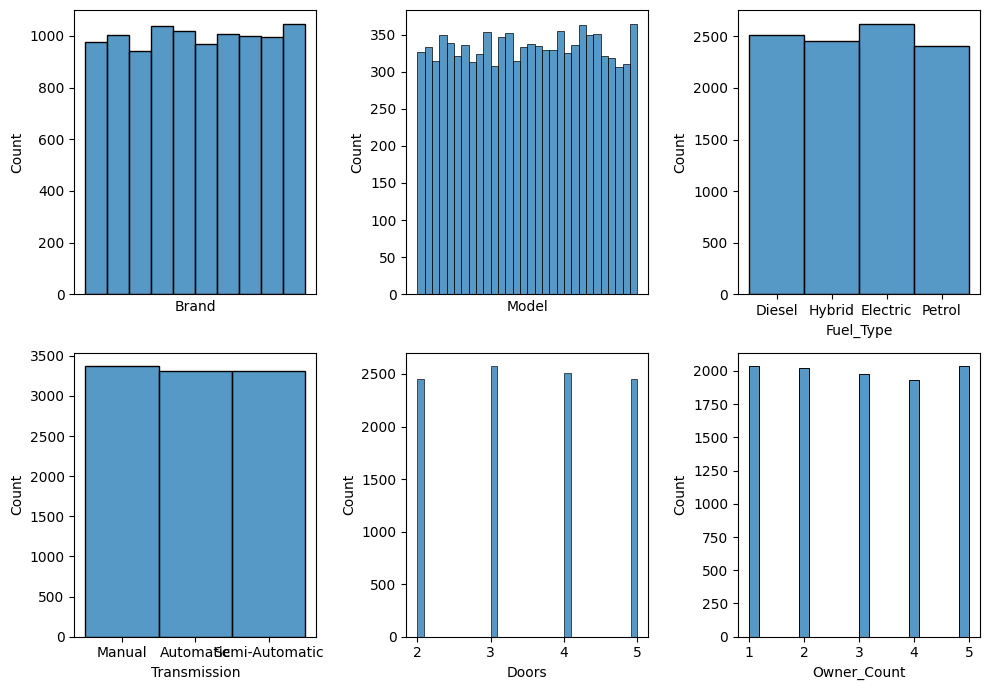

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3,figsize=(10,7))
#histogramas de las variables
sns.histplot(ax= axis[0,0],data=sales_df,x='Brand').set_xticks([])
sns.histplot(ax= axis[0,1],data=sales_df,x='Model').set_xticks([])
sns.histplot(ax= axis[0,2],data=sales_df,x='Fuel_Type')
sns.histplot(ax= axis[1,0],data=sales_df,x='Transmission')
sns.histplot(ax= axis[1,1],data=sales_df,x='Doors')
sns.histplot(ax= axis[1,2],data=sales_df,x='Owner_Count')

#plt.setp(axis[0, 0].xaxis.get_majorticklabels(), rotation=90, ha='right')
#plt.setp(axis[1, 2].xaxis.get_majorticklabels(), rotation=90, ha='right')

#para borrar graficos en blanco
#fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()

<Axes: xlabel='Mileage'>

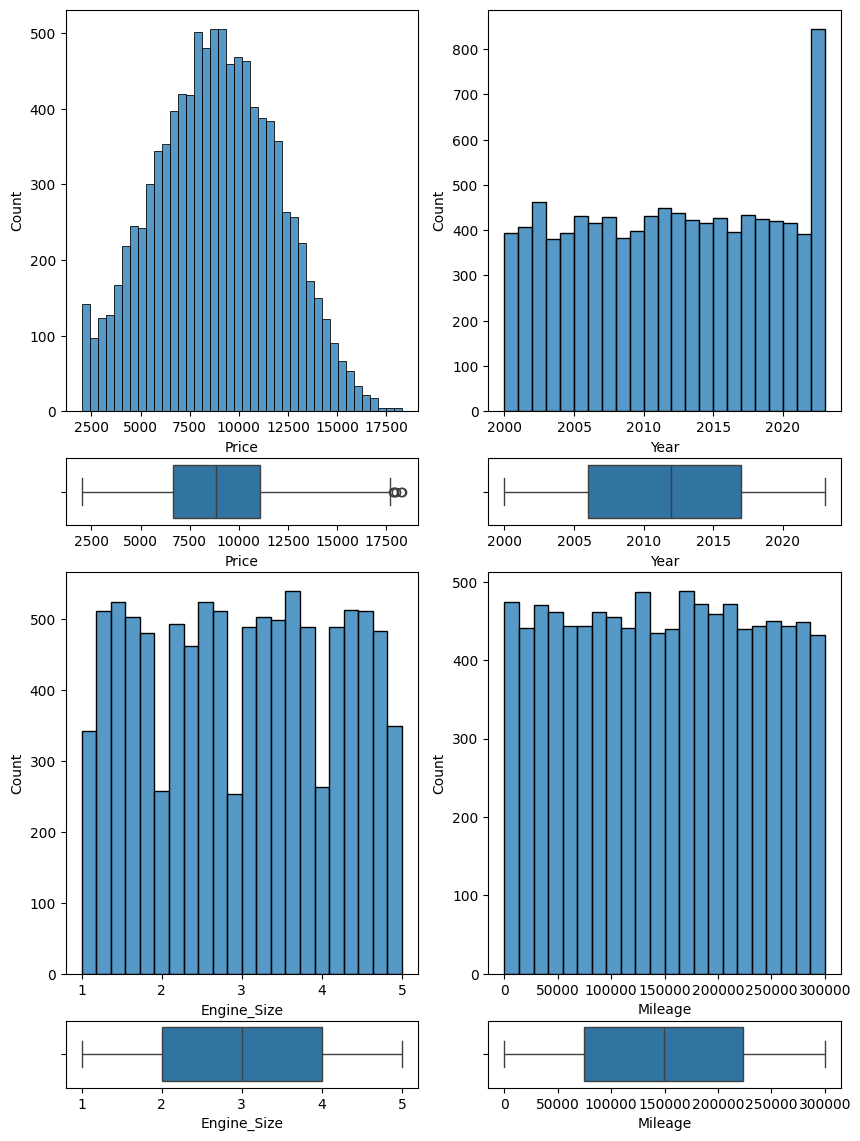

In [5]:
fig, axis = plt.subplots(4,2,figsize=(10,14),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax= axis[0,0],data=sales_df,x='Price')
sns.boxplot(ax=axis[1,0],data=sales_df,x='Price')
sns.histplot(ax= axis[0,1],data=sales_df,x='Year')#.set_xlim(0,60)
sns.boxplot(ax=axis[1,1],data=sales_df,x='Year')#.set_xlim(0,60)
sns.histplot(ax= axis[2,0],data=sales_df,x='Engine_Size')
sns.boxplot(ax=axis[3,0],data=sales_df,x='Engine_Size')
sns.histplot(ax= axis[2,1],data=sales_df,x='Mileage')#.set_xlim(0,100)
sns.boxplot(ax=axis[3,1],data=sales_df,x='Mileage')#.set_xlim(0,100)
